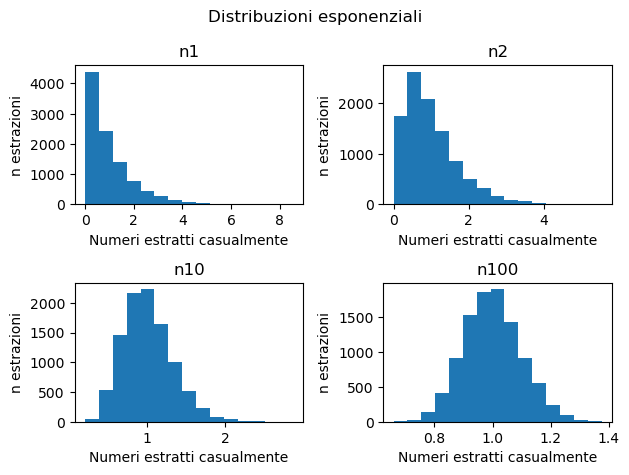

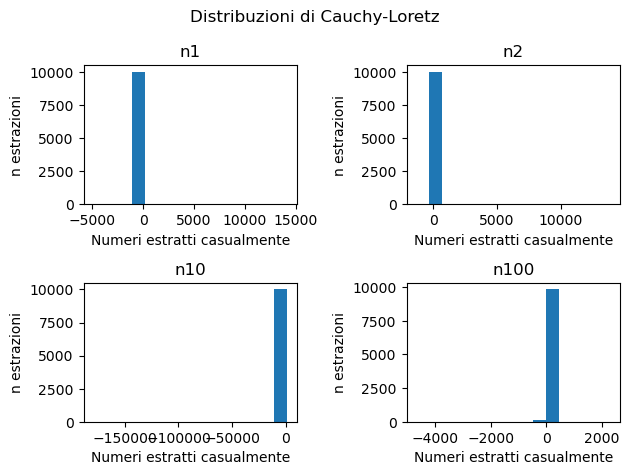

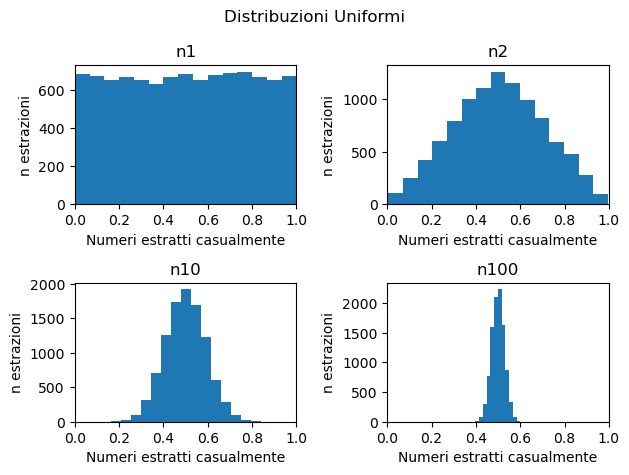

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definisci la funzione di Gauss per il fit
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2)
    
def read_data_from_file(filename):
    # Inizializza due liste vuote per memorizzare i dati
    medie_rannyu = []
    medie_exp = []
    medie_CL = []


    # Apre il file e legge i dati riga per riga
    with open(filename, 'r') as file:  # Modalità "r" per la lettura
        for line in file:
            # Divide ogni riga in due numeri e li aggiunge alle rispettive liste
            values = line.split()
            medie_rannyu.append(float(values[0]))
            medie_exp.append(float(values[1]))
            medie_CL.append(float(values[2]))

    return medie_rannyu, medie_exp, medie_CL

medie_rannyu_n1, medie_exp_n1, medie_CL_n1 = read_data_from_file("n1.dat")
medie_rannyu_n2, medie_exp_n2, medie_CL_n2 = read_data_from_file("n2.dat")
medie_rannyu_n10, medie_exp_n10, medie_CL_n10 = read_data_from_file("n10.dat")
medie_rannyu_n100, medie_exp_n100, medie_CL_n100 = read_data_from_file("n100.dat")

# Definizione dei dati
medie_exp = [medie_exp_n1, medie_exp_n2, medie_exp_n10, medie_exp_n100]  # Medie per distribuzioni esponenziali
medie_CL = [medie_CL_n1, medie_CL_n2, medie_CL_n10, medie_CL_n100]       # Medie per distribuzioni di Cauchy-Lorentz
medie_rannyu = [medie_rannyu_n1, medie_rannyu_n2, medie_rannyu_n10, medie_rannyu_n100]  # Medie per distribuzioni uniformi
labels = ['n1', 'n2', 'n10', 'n100']  # Etichette per i titoli dei sottoplot

# Creazione dei grafici per ciascuna distribuzione
for data, title in zip([medie_exp, medie_CL, medie_rannyu], ['Distribuzioni esponenziali', 'Distribuzioni di Cauchy-Loretz', 'Distribuzioni Uniformi']):
    plt.figure()  # Crea una nuova figura per ogni distribuzione
    plt.suptitle(title)  # Aggiunge un titolo generale alla figura
    
    # Itera attraverso le quattro liste di medie
    for i, medie in enumerate(data, start=1):
        plt.subplot(2, 2, i)  # Crea un sottoplot
        plt.hist(medie, bins=15)  # Crea un istogramma delle medie
        plt.xlabel('Numeri estratti casualmente')  # Aggiunge un'etichetta sull'asse x
        plt.ylabel('n estrazioni')  # Aggiunge un'etichetta sull'asse y
        plt.title(labels[i-1])  # Aggiunge un titolo al sottoplot
        if title == 'Distribuzioni Uniformi':  # Se la distribuzione è uniforme
            plt.xlim(0, 1)  # Imposta i limiti dell'asse x tra 0 e 1

    plt.tight_layout()  # Migliora la disposizione dei sottoplot nella figura

plt.show()  # Visualizza i grafici




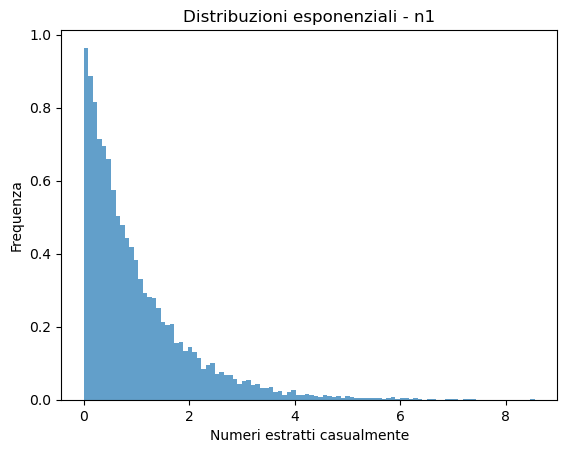

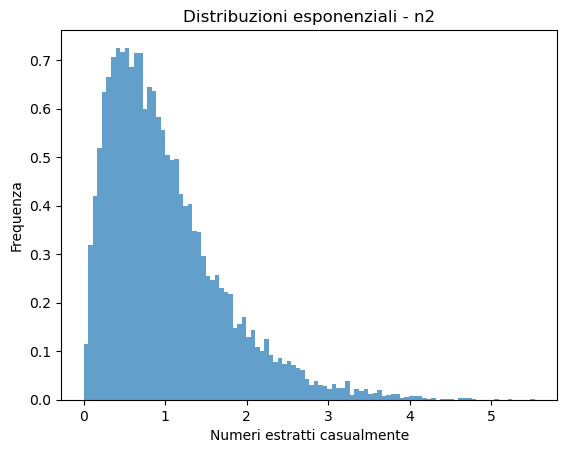

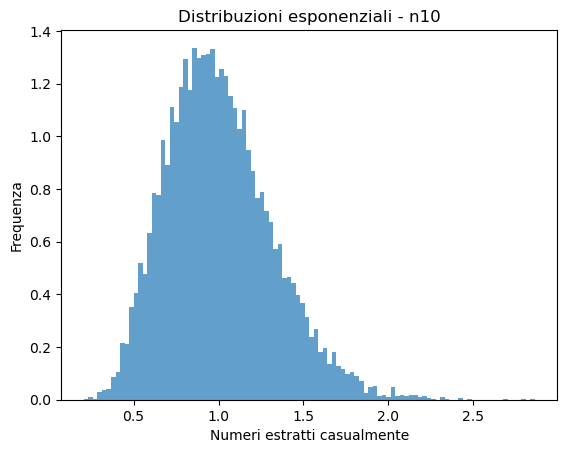

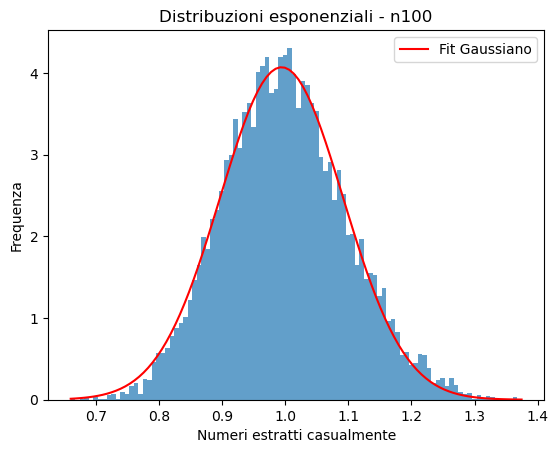

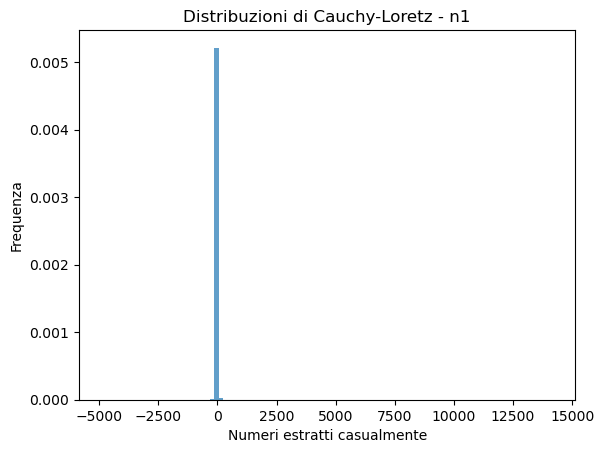

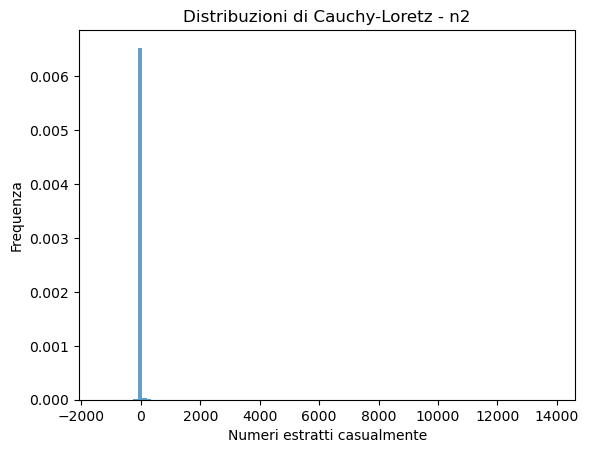

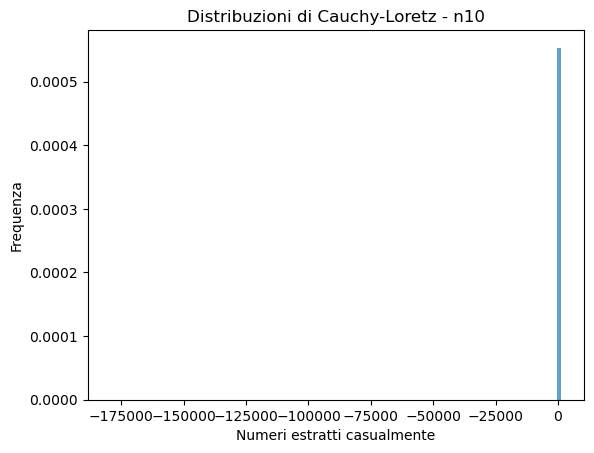

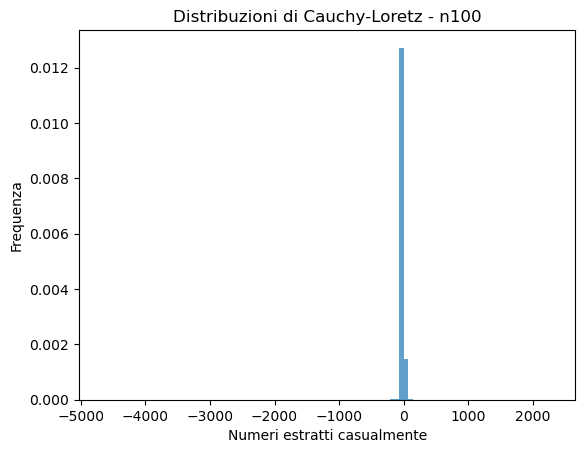

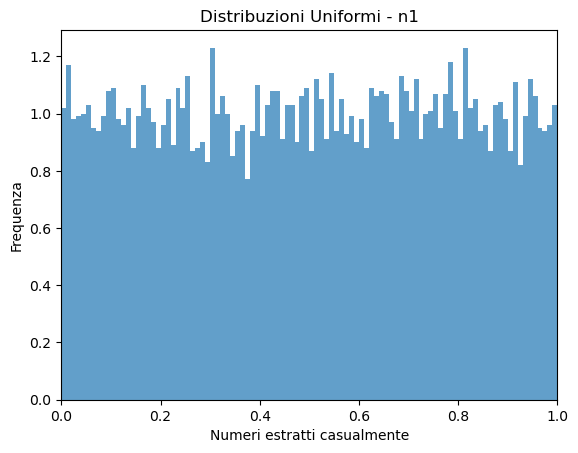

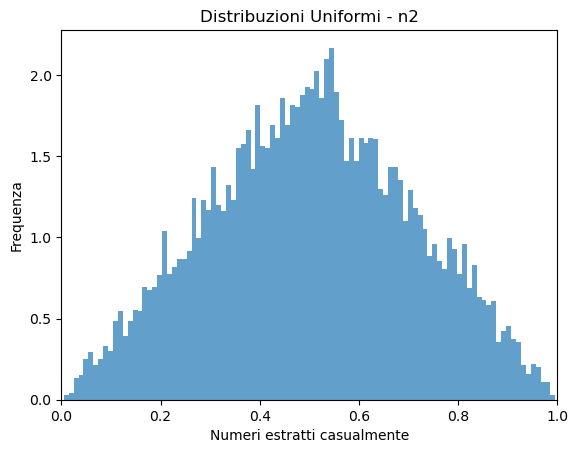

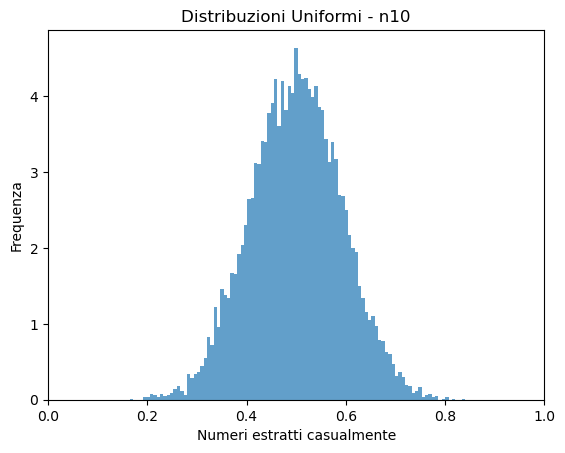

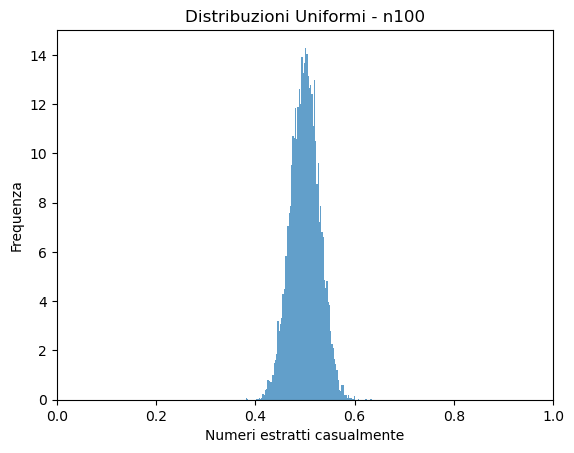

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def read_data_from_file(filename):
    medie_rannyu = []
    medie_exp = []
    medie_CL = []

    with open(filename, 'r') as file:
        for line in file:
            values = line.split()
            medie_rannyu.append(float(values[0]))
            medie_exp.append(float(values[1]))
            medie_CL.append(float(values[2]))

    return medie_rannyu, medie_exp, medie_CL

medie_rannyu_n1, medie_exp_n1, medie_CL_n1 = read_data_from_file("n1.dat")
medie_rannyu_n2, medie_exp_n2, medie_CL_n2 = read_data_from_file("n2.dat")
medie_rannyu_n10, medie_exp_n10, medie_CL_n10 = read_data_from_file("n10.dat")
medie_rannyu_n100, medie_exp_n100, medie_CL_n100 = read_data_from_file("n100.dat")

medie_exp = [medie_exp_n1, medie_exp_n2, medie_exp_n10, medie_exp_n100]
medie_CL = [medie_CL_n1, medie_CL_n2, medie_CL_n10, medie_CL_n100]
medie_rannyu = [medie_rannyu_n1, medie_rannyu_n2, medie_rannyu_n10, medie_rannyu_n100]
labels = ['n1', 'n2', 'n10', 'n100']

for data, title in zip([medie_exp, medie_CL, medie_rannyu], ['Distribuzioni esponenziali', 'Distribuzioni di Cauchy-Loretz', 'Distribuzioni Uniformi']):
    for medie, label in zip(data, labels):
        plt.figure()  
        plt.hist(medie, bins=100, density=True, alpha=0.7)  # Density=True per normalizzare l'istogramma
        plt.title(f'{title} - {label}')  
        plt.xlabel('Numeri estratti casualmente')  
        plt.ylabel('Frequenza')  
        if title == 'Distribuzioni Uniformi':  
            plt.xlim(0, 1)  
    
        
        if title == 'Distribuzioni esponenziali' and label == 'n100':
            # Definizione di una funzione di Gauss per il fit
            def gaussian(x, amplitude, mean, stddev):
                return amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2)

            # Esegui il fit
            bins, edges = np.histogram(medie, bins=100, density=True)
            centers = (edges[:-1] + edges[1:]) / 2
            popt, pcov = curve_fit(gaussian, centers, bins, p0=[1, np.mean(medie), np.std(medie)])

            # Plot del fit sopra l'istogramma
            x_fit = np.linspace(min(medie), max(medie), 100)
            y_fit = gaussian(x_fit, *popt)
            plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')
            plt.legend()

plt.show()

